In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
from sklearn import metrics

In [2]:
#importing dataset
data=pd.read_csv("weatherAUS.csv")
#for more columns or display all columns
pd.set_option("display.max_columns",40)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Date           145460 non-null  bool 
 1   Location       145460 non-null  bool 
 2   MinTemp        145460 non-null  bool 
 3   MaxTemp        145460 non-null  bool 
 4   Rainfall       145460 non-null  bool 
 5   Evaporation    145460 non-null  bool 
 6   Sunshine       145460 non-null  bool 
 7   WindGustDir    145460 non-null  bool 
 8   WindGustSpeed  145460 non-null  bool 
 9   WindDir9am     145460 non-null  bool 
 10  WindDir3pm     145460 non-null  bool 
 11  WindSpeed9am   145460 non-null  bool 
 12  WindSpeed3pm   145460 non-null  bool 
 13  Humidity9am    145460 non-null  bool 
 14  Humidity3pm    145460 non-null  bool 
 15  Pressure9am    145460 non-null  bool 
 16  Pressure3pm    145460 non-null  bool 
 17  Cloud9am       145460 non-null  bool 
 18  Cloud3pm       145460 no

In [4]:
numerical_feature=[]
for feature in data.columns:
    if data[feature].dtype !="O":
        numerical_feature.append(feature)
print(numerical_feature) 

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [5]:
categorical_feature=[]
for col in data.columns:
    if data[col].dtype=="object" or data[col].nunique()<10:
        categorical_feature.append(col) 

In [6]:
data_cat=data[categorical_feature]

# Handle the missing values and encoding

In [7]:
data.isnull().sum()*100/len(data)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [8]:
def randomimputation(data,variable):
    data[variable]=data[variable]
    random_s=data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    random_s.index=data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable]=random_s

In [9]:
randomimputation(data,"Cloud3pm")
randomimputation(data,"Cloud9am")
randomimputation(data,"Sunshine")
randomimputation(data,"Evaporation")

In [10]:
for feature in numerical_feature:
    if (data[feature].isnull().sum()*100/len(data))>0:
        data[feature]=data[feature].fillna(data[feature].median())

In [11]:
data.isnull().sum()*100/len(data)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [12]:
print(data["WindGustDir"].value_counts())
print("------------------**------------")

print("\n",data["WindDir9am"].value_counts())
print("------------------**------------")

print("\n",(data["WindDir3pm"].value_counts()))

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64
------------------**------------

 N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64
------------------**------------

 SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64


In [13]:
windgustdir= {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}

In [14]:
data["WindGustDir"]=data["WindGustDir"].map(windgustdir)
data["WindDir9am"]=data["WindDir9am"].map(winddir9am)
data["WindDir3pm"]=data["WindDir3pm"].map(winddir3pm)

In [15]:
data["WindGustDir"]=data["WindGustDir"].fillna(data["WindGustDir"].value_counts().index[0])
data["WindDir9am"]=data["WindDir9am"].fillna(data["WindDir9am"].value_counts().index[0])
data["WindDir3pm"]=data["WindDir3pm"].fillna(data["WindGustDir"].value_counts().index[0])

In [16]:
data["RainToday"]=pd.get_dummies(data["RainToday"],drop_first=True)
data["RainTomorrow"]=pd.get_dummies(data["RainTomorrow"],drop_first=True)


In [17]:
data.isnull().sum()*100/len(data)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [18]:
data["Date"]=pd.to_datetime(data["Date"],format="%Y-%m-%dT")
data["day_month"]=data["Date"].dt.month
data["day_date"]=data["Date"].dt.day


In [19]:
data["Location"].value_counts()

Canberra            3436
Sydney              3344
Hobart              3193
Melbourne           3193
Perth               3193
Brisbane            3193
Darwin              3193
Adelaide            3193
GoldCoast           3040
Ballarat            3040
AliceSprings        3040
Launceston          3040
MountGinini         3040
Townsville          3040
Albury              3040
Albany              3040
Wollongong          3040
Cairns              3040
MountGambier        3040
Bendigo             3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
WaggaWagga          3009
Nuriootpa           3009
Moree               3009
CoffsHarbour        3009
BadgerysCreek       3009
Portland            3009
MelbourneAirport    3009
NorfolkIsland       3009
Woomera             3009
Williamtown         3009
Dartmoor            3009
Richmond            3009
PearceRAAF          3009
Cobar               3009
Witchcliffe         3009
SydneyAirport       3009
Sale                3009


In [20]:
df=data.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [21]:
ad=df[1].sort_values(ascending = False)
ad

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [22]:
ad.index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [23]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
data["Location"] = data["Location"].map(location)

In [24]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day_month,day_date
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


# Handle the outliers

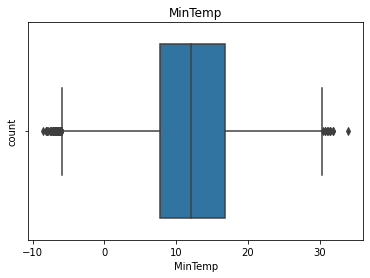

<Figure size 1080x1080 with 0 Axes>

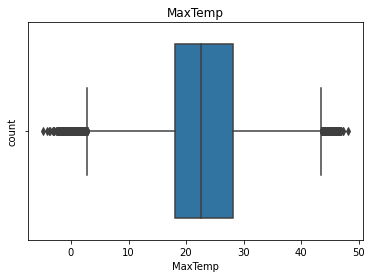

<Figure size 1080x1080 with 0 Axes>

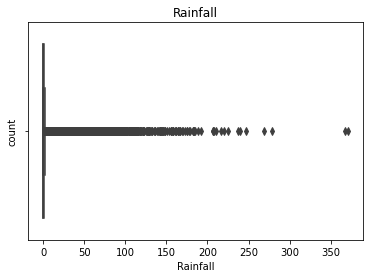

<Figure size 1080x1080 with 0 Axes>

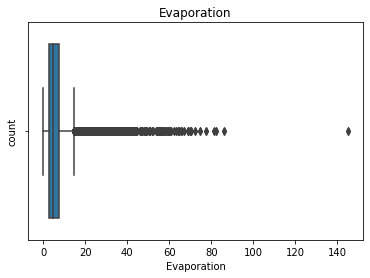

<Figure size 1080x1080 with 0 Axes>

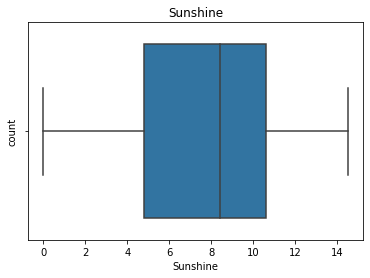

<Figure size 1080x1080 with 0 Axes>

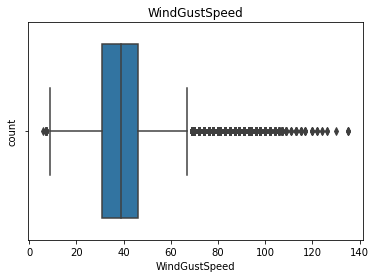

<Figure size 1080x1080 with 0 Axes>

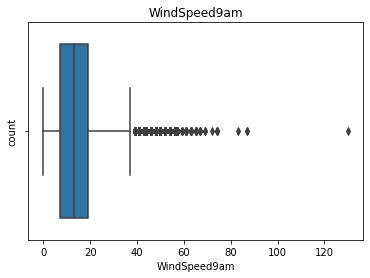

<Figure size 1080x1080 with 0 Axes>

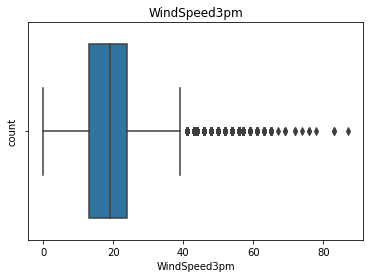

<Figure size 1080x1080 with 0 Axes>

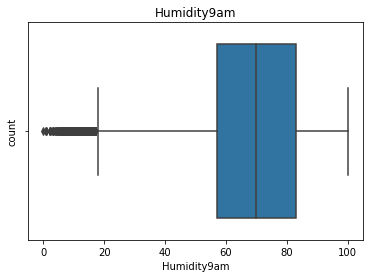

<Figure size 1080x1080 with 0 Axes>

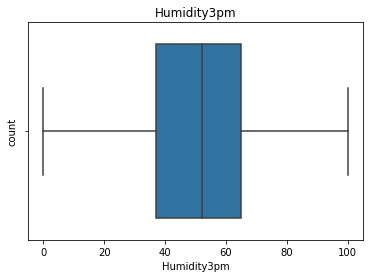

<Figure size 1080x1080 with 0 Axes>

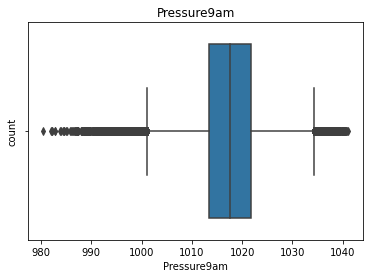

<Figure size 1080x1080 with 0 Axes>

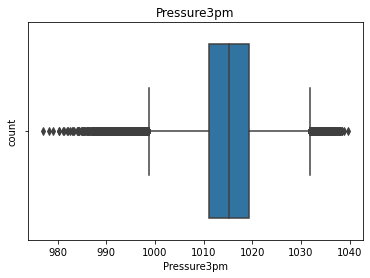

<Figure size 1080x1080 with 0 Axes>

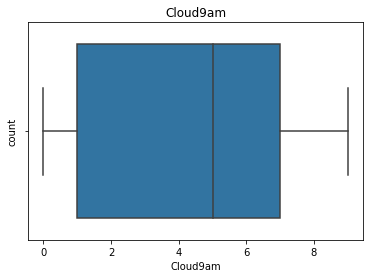

<Figure size 1080x1080 with 0 Axes>

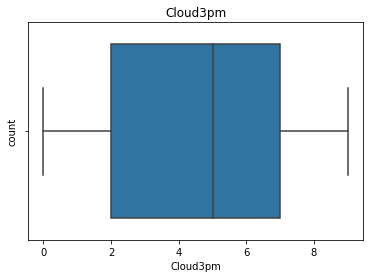

<Figure size 1080x1080 with 0 Axes>

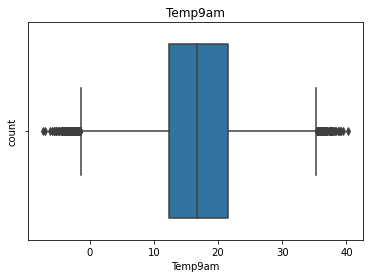

<Figure size 1080x1080 with 0 Axes>

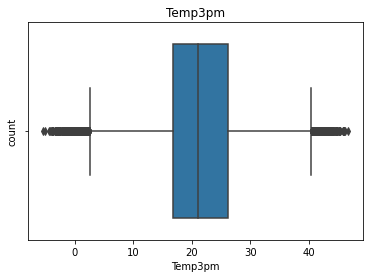

<Figure size 1080x1080 with 0 Axes>

In [25]:
for feature in numerical_feature:
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

In [26]:
data_num=data[numerical_feature]
for col in data_num.columns:
    print("----------------"+col+"------------------")
    display(data_num[col].describe())

----------------MinTemp------------------


count    145460.000000
mean         12.192053
std           6.365780
min          -8.500000
25%           7.700000
50%          12.000000
75%          16.800000
max          33.900000
Name: MinTemp, dtype: float64

----------------MaxTemp------------------


count    145460.000000
mean         23.215962
std           7.088358
min          -4.800000
25%          18.000000
50%          22.600000
75%          28.200000
max          48.100000
Name: MaxTemp, dtype: float64

----------------Rainfall------------------


count    145460.000000
mean          2.307990
std           8.389771
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         371.000000
Name: Rainfall, dtype: float64

----------------Evaporation------------------


count    145460.000000
mean          5.464988
std           4.210586
min           0.000000
25%           2.600000
50%           4.800000
75%           7.400000
max         145.000000
Name: Evaporation, dtype: float64

----------------Sunshine------------------


count    145460.000000
mean          7.609641
std           3.785983
min           0.000000
25%           4.800000
50%           8.400000
75%          10.600000
max          14.500000
Name: Sunshine, dtype: float64

----------------WindGustSpeed------------------


count    145460.000000
mean         39.962189
std          13.120931
min           6.000000
25%          31.000000
50%          39.000000
75%          46.000000
max         135.000000
Name: WindGustSpeed, dtype: float64

----------------WindSpeed9am------------------


count    145460.000000
mean         14.030751
std           8.861796
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max         130.000000
Name: WindSpeed9am, dtype: float64

----------------WindSpeed3pm------------------


count    145460.000000
mean         18.669758
std           8.716716
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          87.000000
Name: WindSpeed3pm, dtype: float64

----------------Humidity9am------------------


count    145460.000000
mean         68.901251
std          18.855360
min           0.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64

----------------Humidity3pm------------------


count    145460.000000
mean         51.553396
std          20.471345
min           0.000000
25%          37.000000
50%          52.000000
75%          65.000000
max         100.000000
Name: Humidity3pm, dtype: float64

----------------Pressure9am------------------


count    145460.000000
mean       1017.644768
std           6.728484
min         980.500000
25%        1013.500000
50%        1017.600000
75%        1021.800000
max        1041.000000
Name: Pressure9am, dtype: float64

----------------Pressure3pm------------------


count    145460.000000
mean       1015.250115
std           6.663994
min         977.100000
25%        1011.100000
50%        1015.200000
75%        1019.400000
max        1039.600000
Name: Pressure3pm, dtype: float64

----------------Cloud9am------------------


count    145460.000000
mean          4.446556
std           2.887669
min           0.000000
25%           1.000000
50%           5.000000
75%           7.000000
max           9.000000
Name: Cloud9am, dtype: float64

----------------Cloud3pm------------------


count    145460.000000
mean          4.508112
std           2.719517
min           0.000000
25%           2.000000
50%           5.000000
75%           7.000000
max           9.000000
Name: Cloud3pm, dtype: float64

----------------Temp9am------------------


count    145460.000000
mean         16.987101
std           6.449299
min          -7.200000
25%          12.300000
50%          16.700000
75%          21.500000
max          40.200000
Name: Temp9am, dtype: float64

----------------Temp3pm------------------


count    145460.000000
mean         21.668916
std           6.850658
min          -5.400000
25%          16.700000
50%          21.100000
75%          26.200000
max          46.700000
Name: Temp3pm, dtype: float64

In [27]:
def outliers(data,variable):
    IQR=data[variable].describe()["75%"]-data[variable].describe()["25%"]
    lower_boundary=data[variable].describe()["25%"]-(1.5*IQR)
    upper_boundary=data[variable].describe()["75%"]+(1.5*IQR)
    return(lower_boundary,upper_boundary)
    

In [28]:
print(outliers(data,"MinTemp"),"\n")
print(outliers(data,"MaxTemp"),"\n")
print(outliers(data,"Rainfall"),"\n")
print(outliers(data,"Evaporation"),"\n")
print(outliers(data,"WindGustSpeed"),"\n")
print(outliers(data,"WindSpeed9am"),"\n")
print(outliers(data,"WindSpeed3pm"),"\n")
print(outliers(data,"Humidity9am"),"\n")
print(outliers(data,"Pressure9am"),"\n")
print(outliers(data,"Pressure3pm"),"\n")
print(outliers(data,"Temp9am"),"\n")
print(outliers(data,"Temp3pm"))


(-5.950000000000002, 30.450000000000003) 

(2.700000000000001, 43.5) 

(-0.8999999999999999, 1.5) 

(-4.600000000000001, 14.600000000000001) 

(8.5, 68.5) 

(-11.0, 37.0) 

(-3.5, 40.5) 

(18.0, 122.0) 

(1001.0500000000001, 1034.25) 

(998.6500000000001, 1031.85) 

(-1.4999999999999982, 35.3) 

(2.4499999999999993, 40.45)


In [29]:
# mintemp
data.loc[data['MinTemp']>=30.45,'MinTemp']=30.45
data.loc[data['MinTemp']<=-5.95,'MinTemp']=-5.95
# maxtemp
data.loc[data['MaxTemp']>=43.5,'MaxTemp']=43.5
data.loc[data['MaxTemp']<=2.7,'MaxTemp']=2.7
# rainfall
data.loc[data['Rainfall']>=1.5,'Rainfall']=1.5
data.loc[data['Rainfall']<=-0.89,'Rainfall']=-0.89
# Evaporation
data.loc[data['Evaporation']>=14.6,'Evaporation']=14.6
data.loc[data['Evaporation']<=-4.6,'Evaporation']=-4.6
# WindGustSpeed
data.loc[data['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
data.loc[data['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5
# WindSpeed9am
data.loc[data['WindSpeed9am']>=37.0,'WindSpeed9am']=37.0
data.loc[data['WindSpeed9am']<=-11.0,'WindSpeed9am']=-11.0
# WindSpeed3pm
data.loc[data['WindSpeed3pm']>=40.5,'WindSpeed3pm']=40.5
data.loc[data['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5
# Humidity9am
data.loc[data['Humidity9am']>=122.0,'Humidity9am']=122.0
data.loc[data['Humidity9am']<=18.0,'Humidity9am']=18.0
# Pressure9am
data.loc[data['Pressure9am']>= 1034.25,'Pressure9am']= 1034.25
data.loc[data['Pressure9am']<=1001.05,'Pressure9am']=1001.05
# Pressure3pm
data.loc[data['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
data.loc[data['Pressure3pm']<=998.6,'Pressure3pm']=998.6
# Temp9am
data.loc[data['Temp9am']>=35.3,'Temp9am']=35.3
data.loc[data['Temp9am']<=-1.49,'Temp9am']=-1.49
# Temp3pm
data.loc[data['Temp3pm']>=40.45,'Temp3pm']=40.45
data.loc[data['Temp3pm']<=2.44,'Temp3pm']=2.44

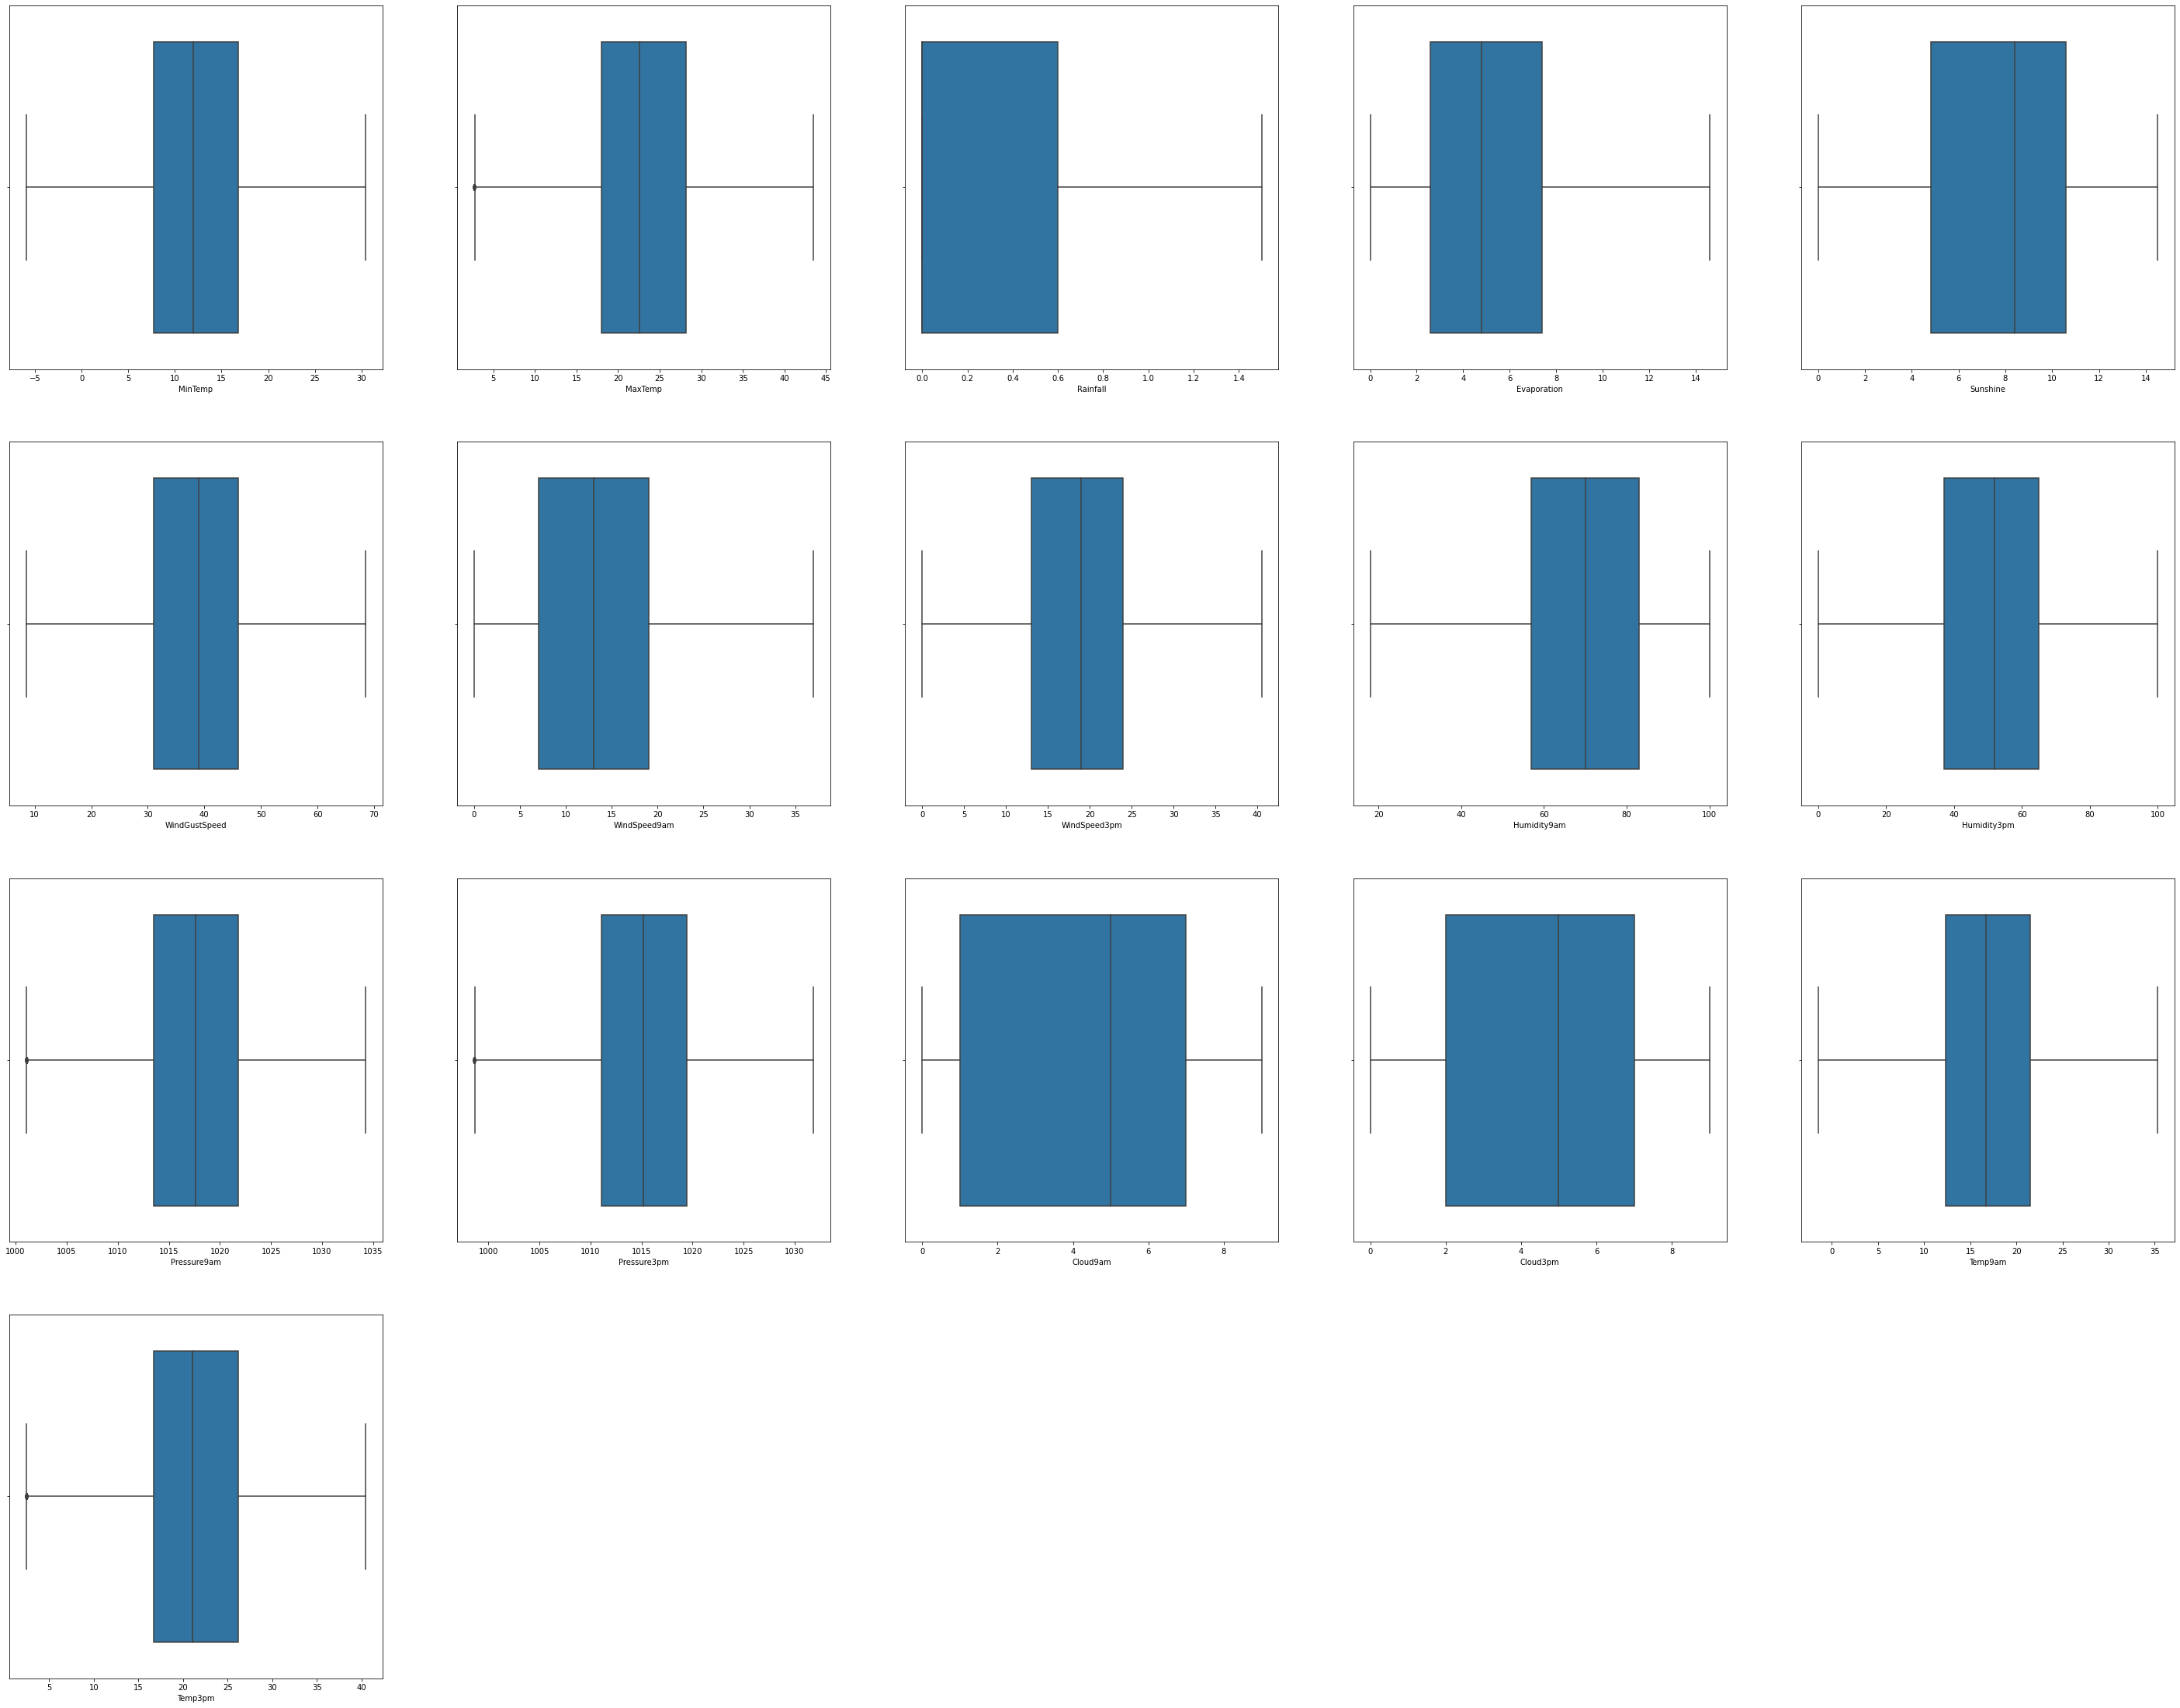

In [30]:
plt.figure(figsize=(50,50))
for i,out in enumerate(numerical_feature,1):
    da=data.copy()
    plt.subplot(5,5,i)
    sns.boxplot(da[out])

# EDA(Exploring Data Analysis)


In [31]:
data["RainTomorrow"].value_counts()/data["RainTomorrow"].value_counts().sum()*100

0    78.085384
1    21.914616
Name: RainTomorrow, dtype: float64

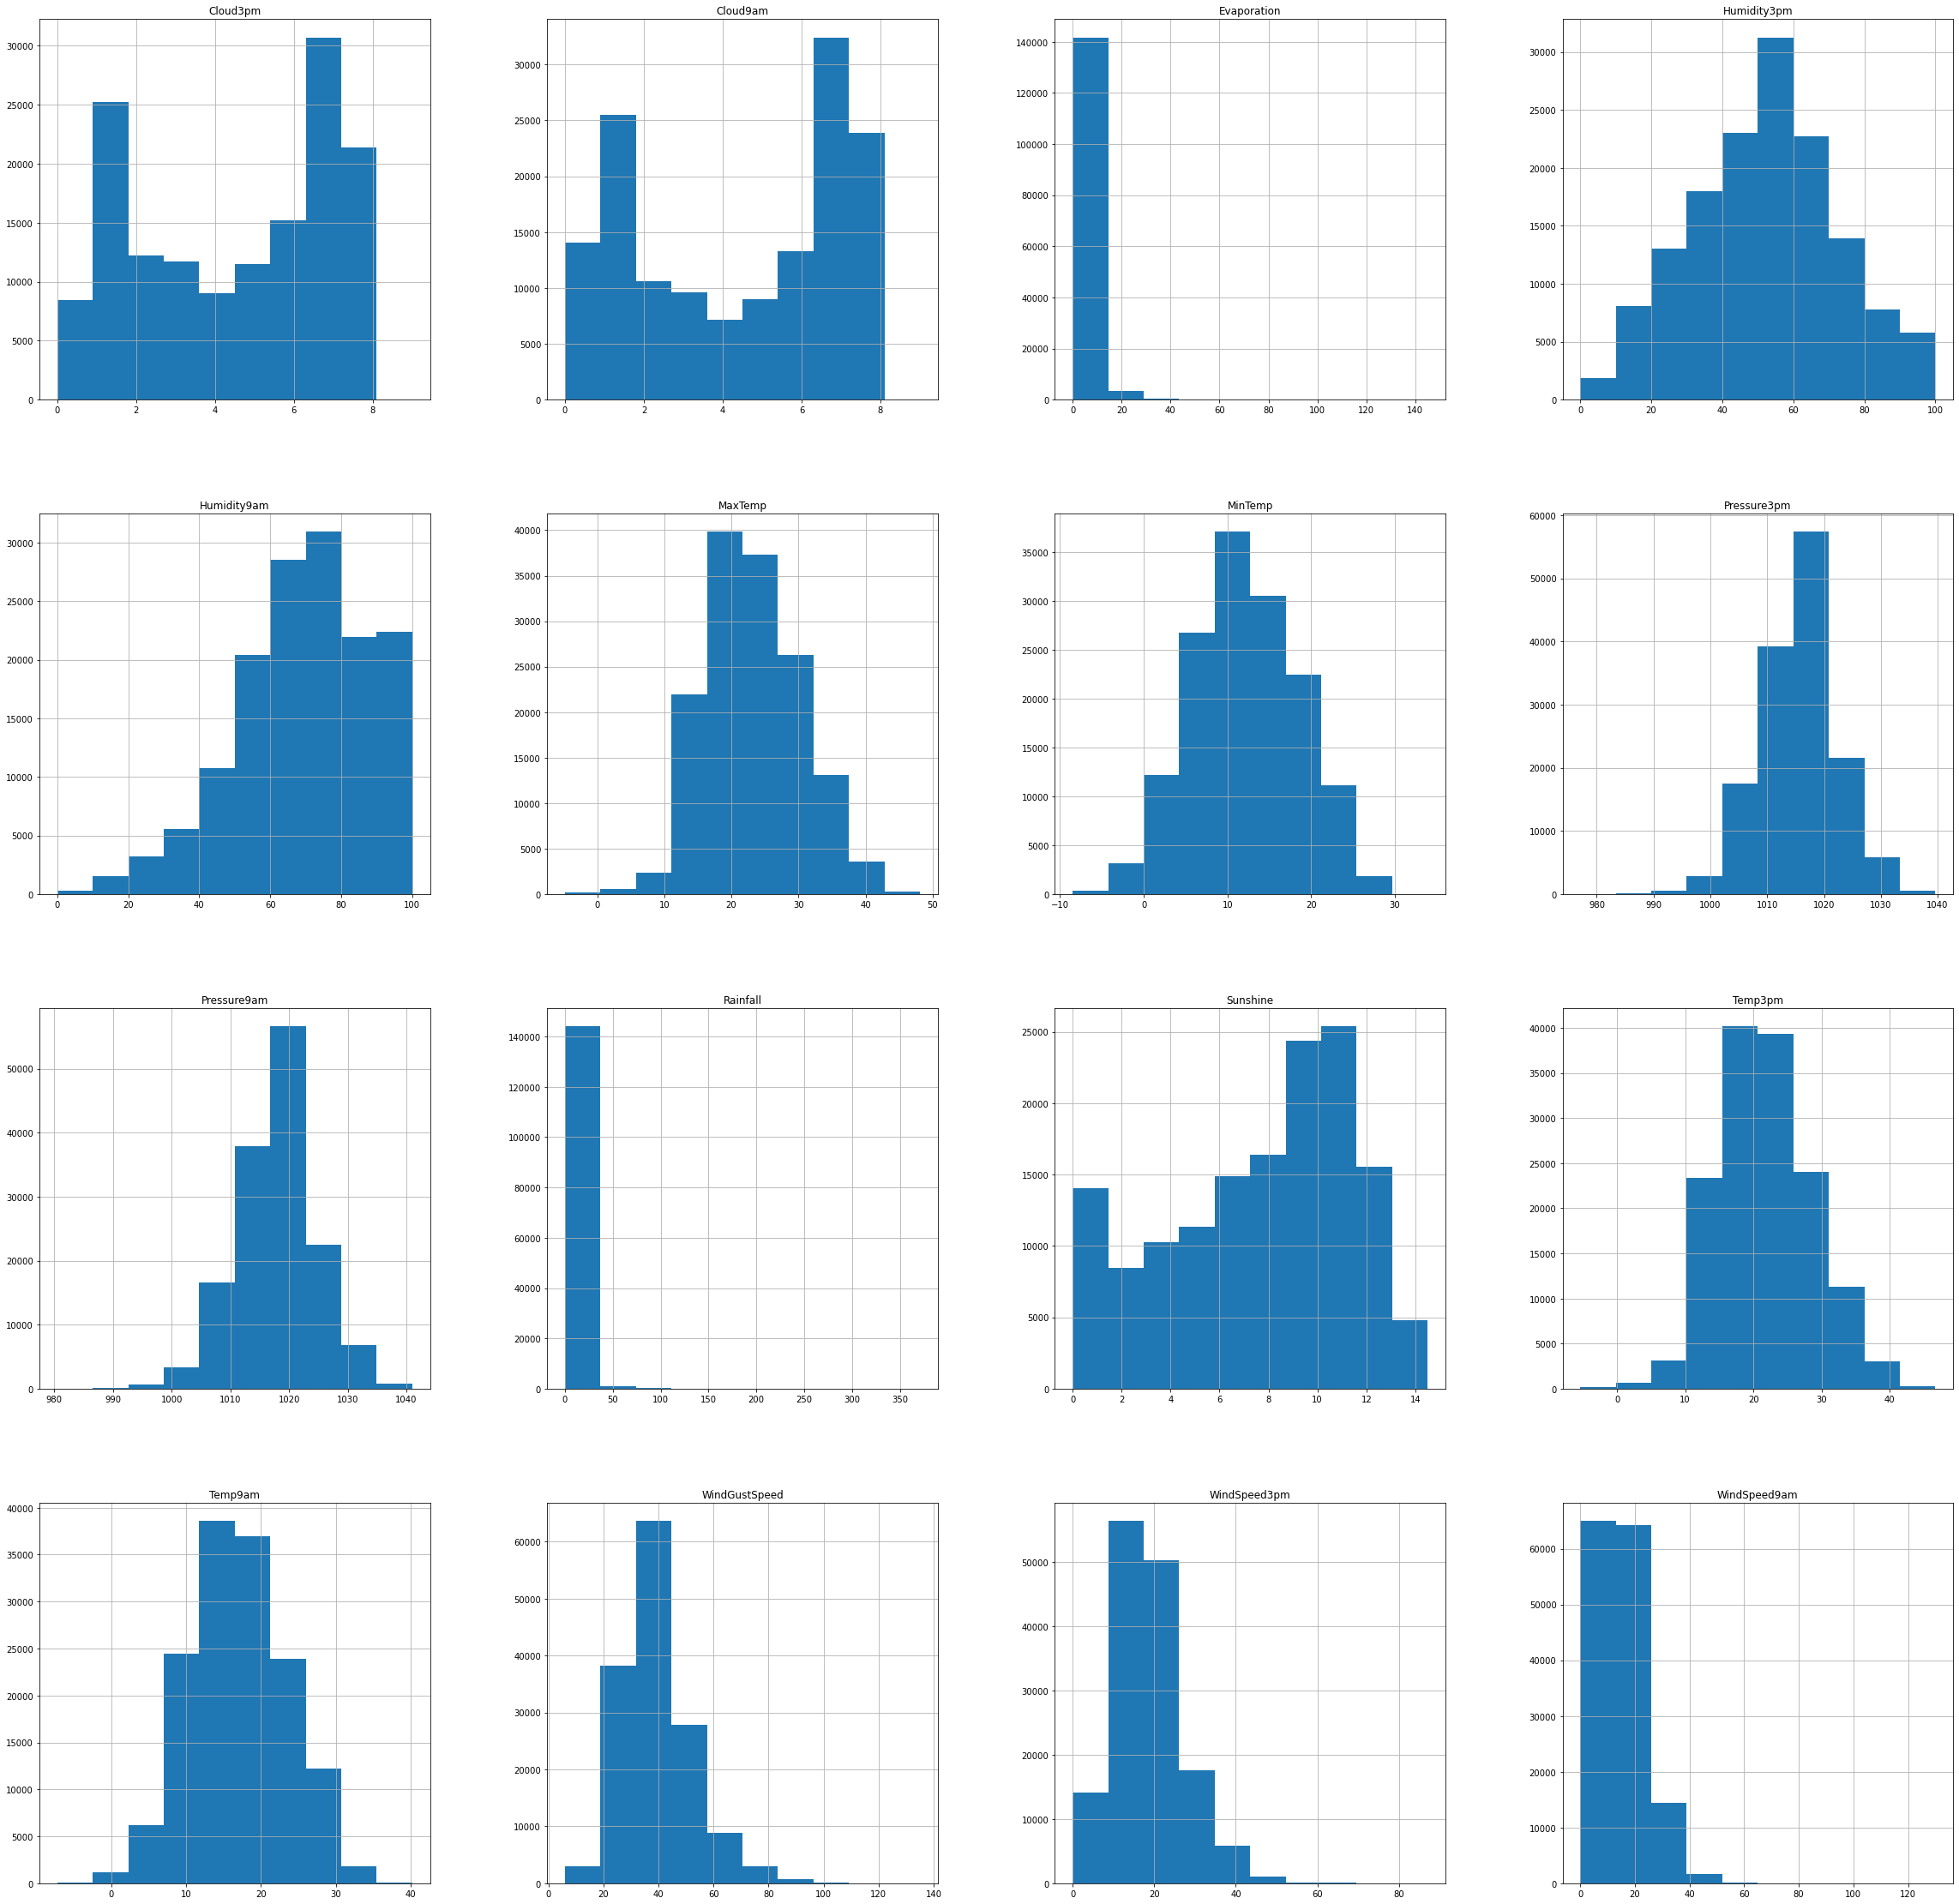

In [32]:
data_num.hist(figsize=(40,40))
plt.show()

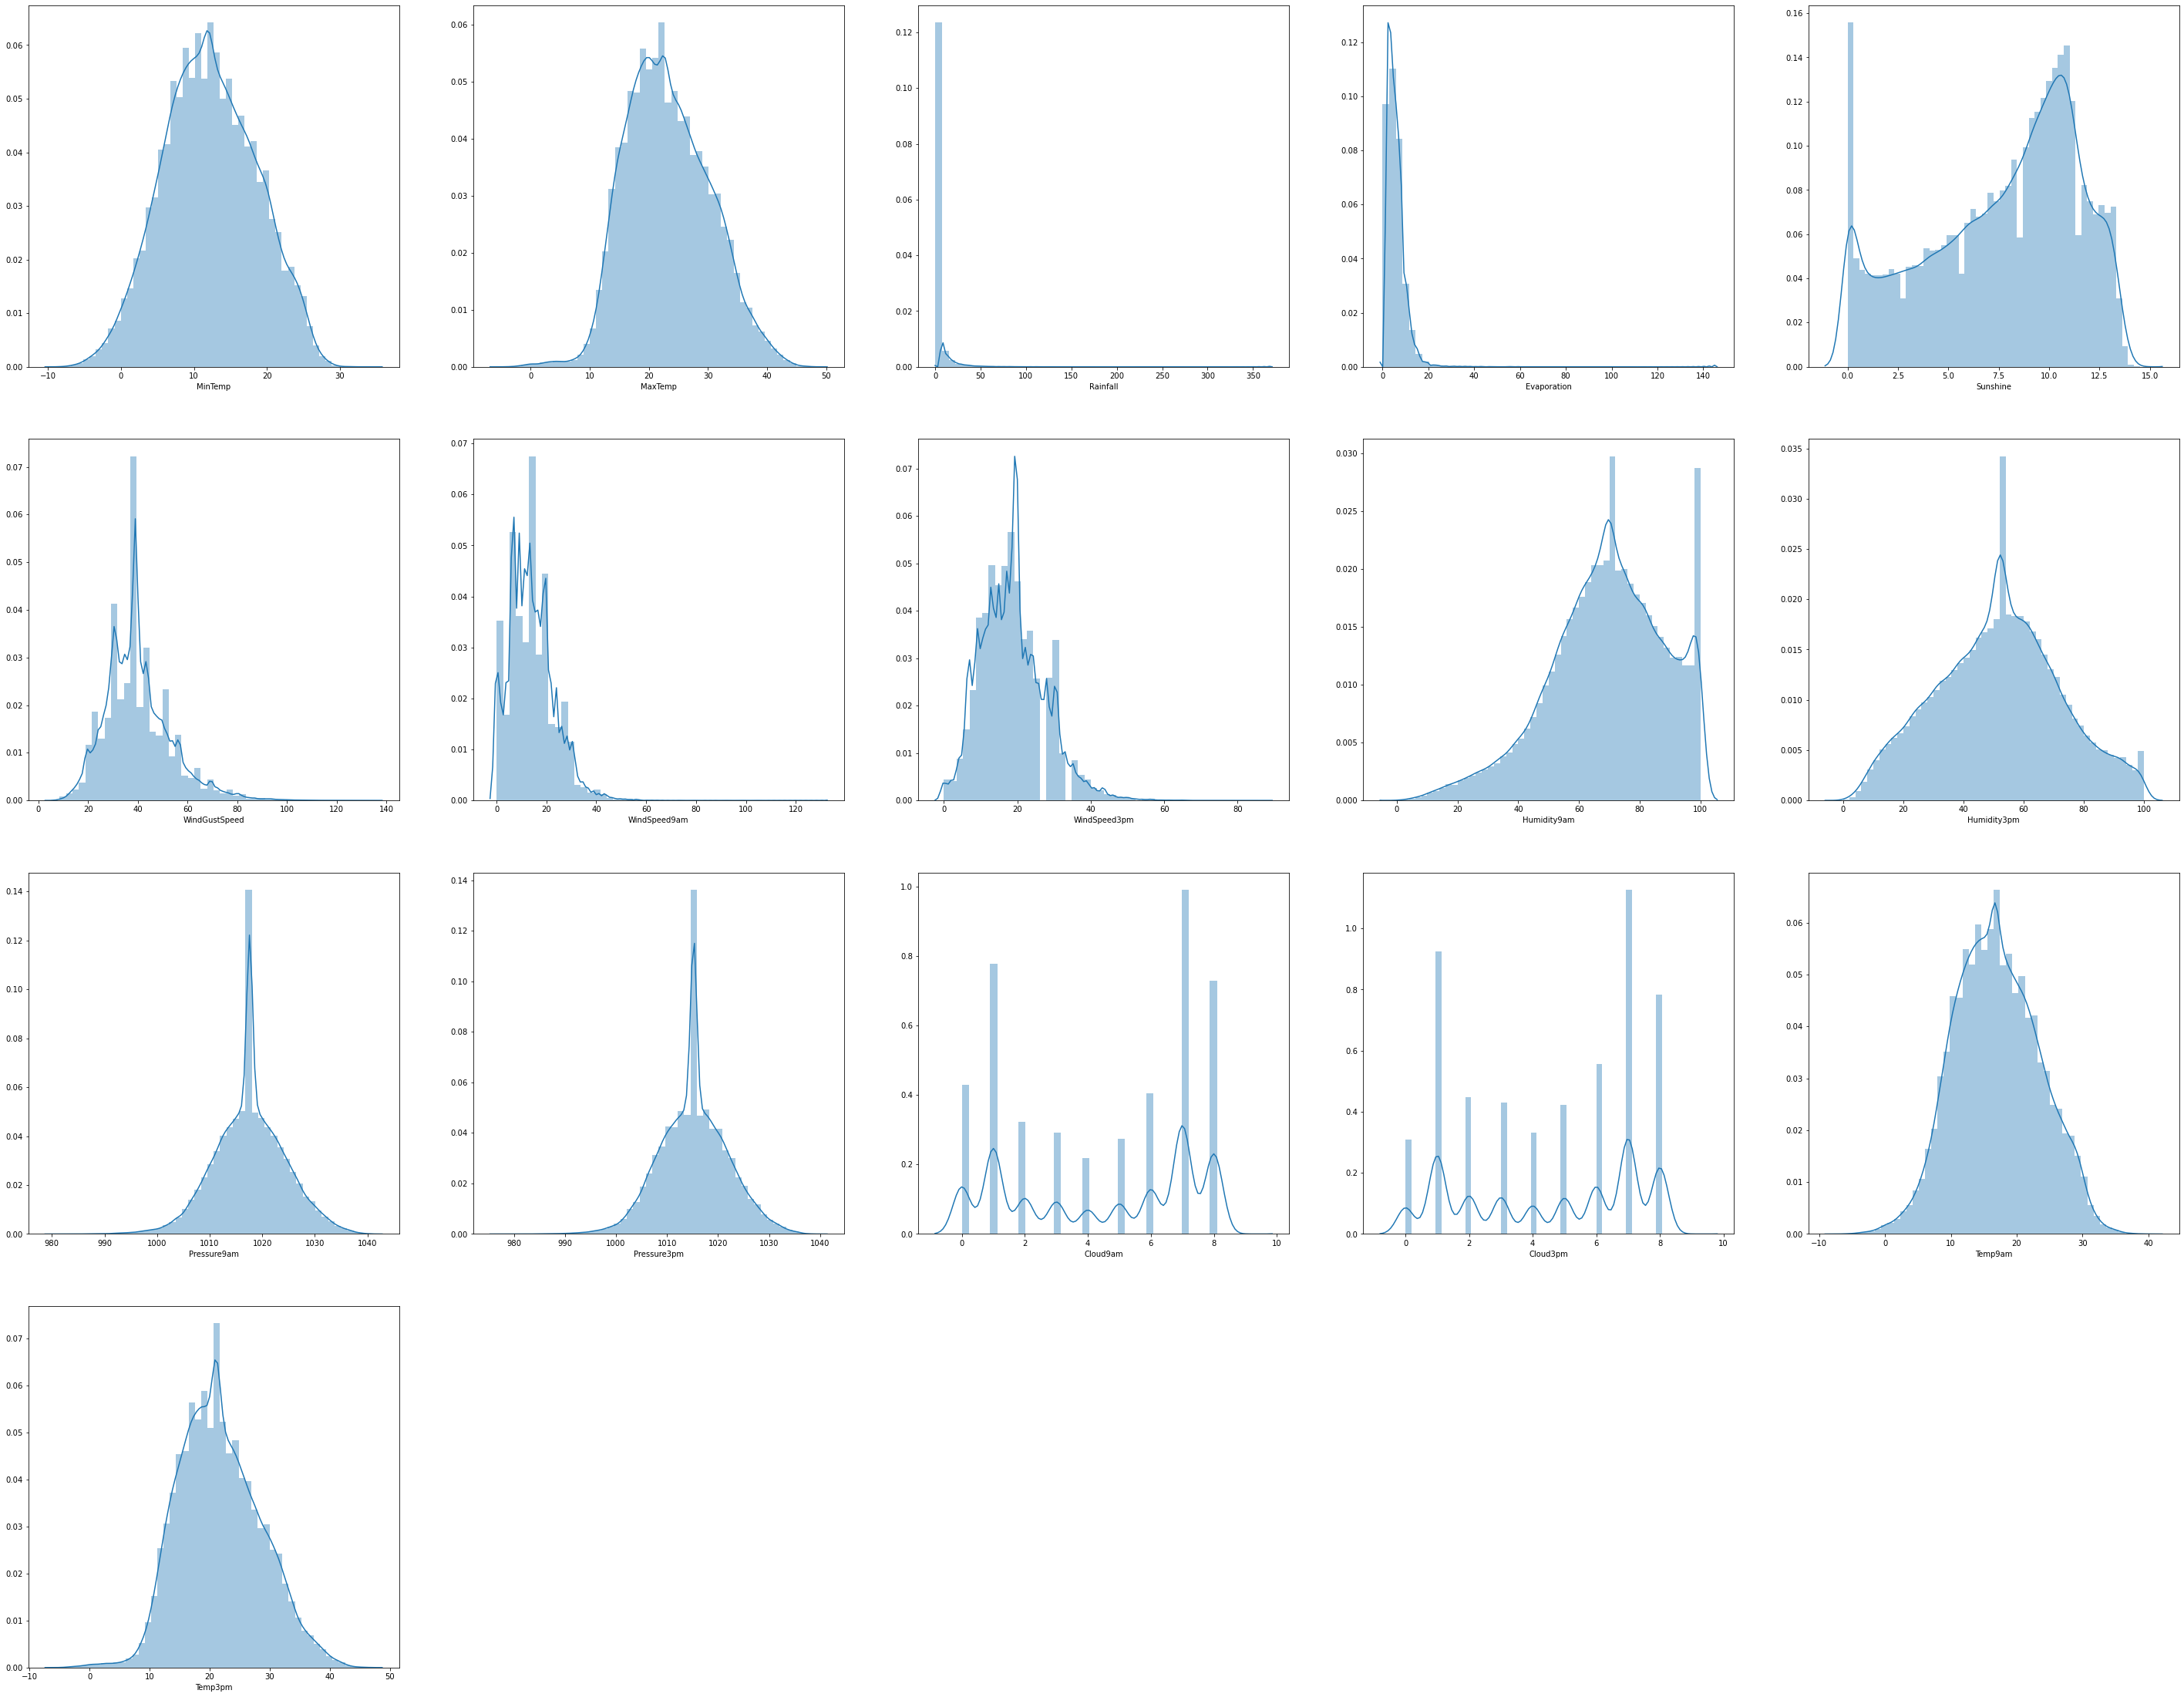

In [33]:
plt.figure(figsize=(50,50))
for i,col in enumerate(data_num.columns,1):
    plt.subplot(5,5,i)
    sns.distplot(data_num[col])

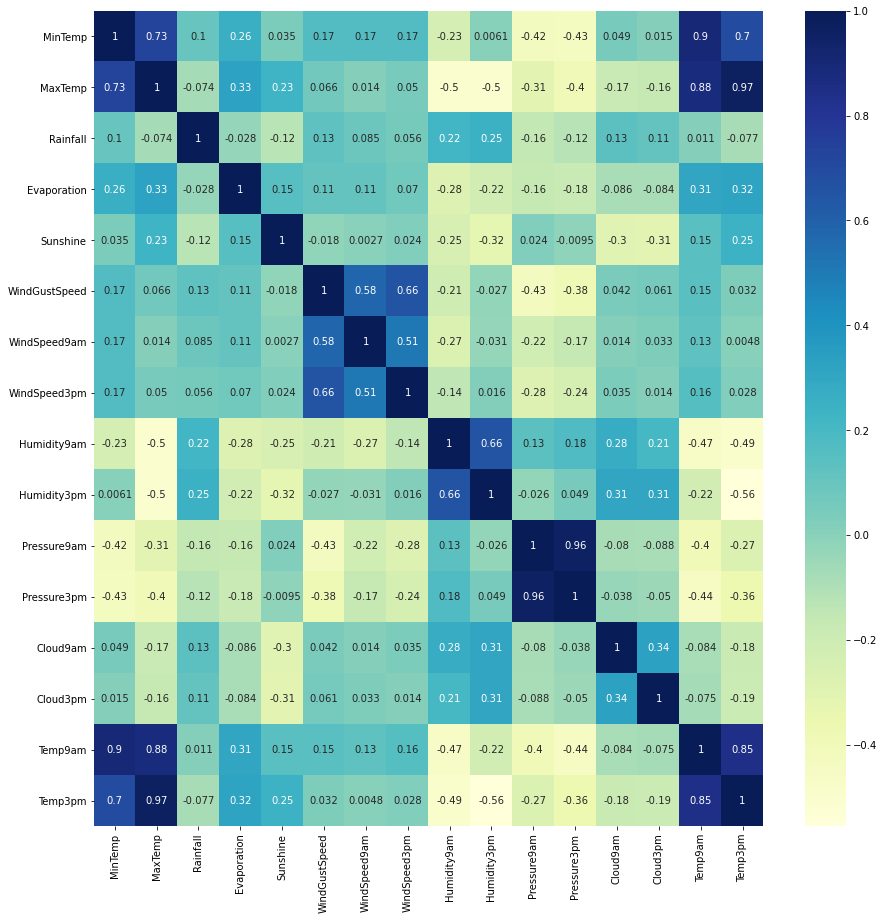

In [34]:
cor=data_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,cmap=("YlGnBu"))

In [35]:
data.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day_month,day_date
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1


# Split data into dependent and independent

In [36]:
x = data.drop(["RainTomorrow", "Date"], axis=1)
y = data["RainTomorrow"]

# Split the data into train and test

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,stratify=y, random_state=42)

# Handling imbalanced data
#### SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
sm=SMOTE(k_neighbors=13)
x_smo,y_smo=sm.fit_resample(x_train,y_train)

1    76100
0    76100
Name: RainTomorrow, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755)


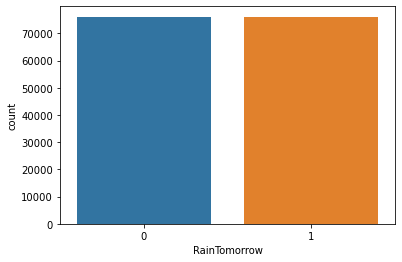

In [42]:
print(y_smo.value_counts(),"\n")
print(sns.countplot(y_smo))

In [43]:
from sklearn.preprocessing import MinMaxScaler
sd=MinMaxScaler()
x_smo=sd.fit_transform(x_smo)
x_test=sd.transform(x_test)

# build the model

In [44]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_smo,y_smo)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred=lr_model.predict(x_test)

#making the confusion metrics
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(y_test,y_pred),index=["actual 0","actual 1"],columns=["pred 0","pred 1"])
print(cm,"\n")
# performance
from sklearn.metrics import accuracy_score
print("accuracy score for test data:",accuracy_score(y_test,y_pred),"\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

          pred 0  pred 1
actual 0   30160    7323
actual 1    2803    7716 

accuracy score for test data: 0.7890504562309903 

              precision    recall  f1-score   support

           0       0.91      0.80      0.86     37483
           1       0.51      0.73      0.60     10519

    accuracy                           0.79     48002
   macro avg       0.71      0.77      0.73     48002
weighted avg       0.83      0.79      0.80     48002



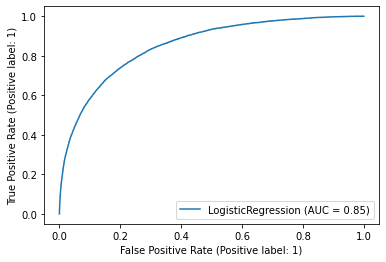

In [58]:
metrics.plot_roc_curve(lr_model, x_test, y_test)


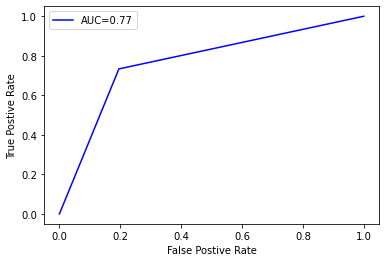

0.7690806180647443

In [57]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
ra=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%ra)
plt.legend()
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
metrics.roc_auc_score(y_test, y_pred) 

# Hypertuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV

params={"solver":['newton-cg', 'lbfgs', 'sag','saga'],
    "penalty":["l2","l1"],"C":[.1,1,10,100],"max_iter":[10,20,30,45,60,100,150,200]}

lr_hyper=RandomizedSearchCV(lr_model,params,cv=5,scoring="accuracy",n_jobs=2,verbose=1)
lr_hyper.fit(x_smo,y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.78869251        nan 0.78868594        nan 0.78932326        nan
 0.78944152        nan 0.78870565 0.78941524]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=2,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'max_iter': [10, 20, 30, 45, 60, 100,
                                                     150, 200],
                                        'penalty': ['l2', 'l1'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga']},
                   scoring='accuracy', verbose=1)

In [60]:
print(lr_hyper.best_params_)
print("\n",lr_hyper.best_estimator_)
print("\n",lr_hyper.best_score_)

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 150, 'C': 10}

 LogisticRegression(C=10, max_iter=150, solver='saga')

 0.7894415243101183


In [61]:
y_p_hyper=lr_hyper.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_p_hyper))

              precision    recall  f1-score   support

           0       0.91      0.80      0.86     37483
           1       0.51      0.73      0.60     10519

    accuracy                           0.79     48002
   macro avg       0.71      0.77      0.73     48002
weighted avg       0.83      0.79      0.80     48002



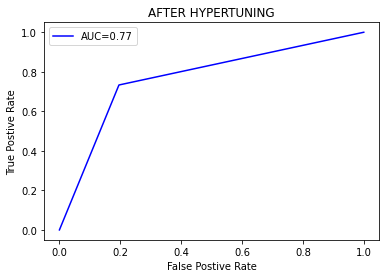

0.7687971102592714

In [62]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_p_hyper)
ra=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%ra)
plt.legend()
plt.title("AFTER HYPERTUNING")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
metrics.roc_auc_score(y_test, y_p_hyper) 

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5,p=2)
knn_model.fit(x_smo,y_smo)

KNeighborsClassifier()

In [64]:
y_pred2=knn_model.predict(x_test)

#making the confusion metrics
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(y_test,y_pred2),index=["actual 0","actual 1"],columns=["pred 0","pred 1"])
print(cm,"\n")
# performance
from sklearn.metrics import accuracy_score
print("accuracy score for test data:",accuracy_score(y_test,y_pred2),"\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

          pred 0  pred 1
actual 0   28479    9004
actual 1    3035    7484 

accuracy score for test data: 0.7491979500854131 

              precision    recall  f1-score   support

           0       0.90      0.76      0.83     37483
           1       0.45      0.71      0.55     10519

    accuracy                           0.75     48002
   macro avg       0.68      0.74      0.69     48002
weighted avg       0.81      0.75      0.77     48002



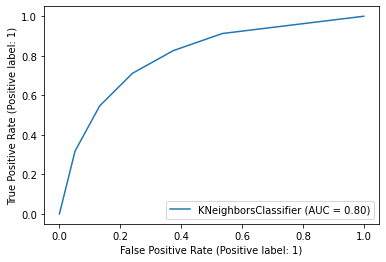

In [65]:
metrics.plot_roc_curve(knn_model, x_test, y_test)


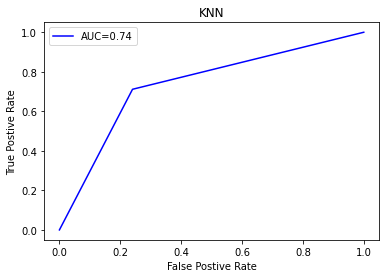

0.7356294551853841

In [72]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred2)
ra=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%ra)
plt.legend()
plt.title("KNN")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
metrics.roc_auc_score(y_test, y_pred2)

# SVM

In [67]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_smo, y_smo)

SVC()

In [68]:
y_pred3 = svc.predict(x_test)
#making the confusion metrics
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(y_test,y_pred3),index=["actual 0","actual 1"],columns=["pred 0","pred 1"])
print(cm,"\n")
# performance
from sklearn.metrics import accuracy_score
print("accuracy score for test data:",accuracy_score(y_test,y_pred3),"\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

          pred 0  pred 1
actual 0   31475    6008
actual 1    3004    7515 

accuracy score for test data: 0.8122578225907254 

              precision    recall  f1-score   support

           0       0.91      0.84      0.87     37483
           1       0.56      0.71      0.63     10519

    accuracy                           0.81     48002
   macro avg       0.73      0.78      0.75     48002
weighted avg       0.83      0.81      0.82     48002



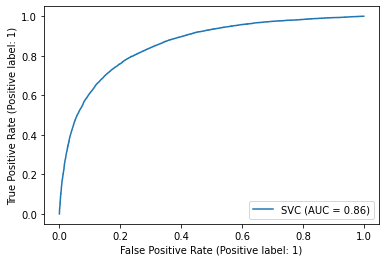

In [69]:
metrics.plot_roc_curve(svc, x_test, y_test)


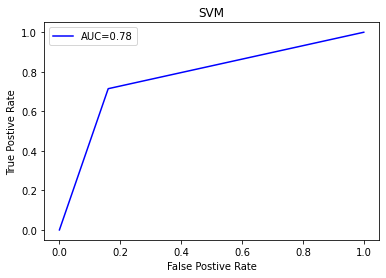

0.7770677633200627

In [71]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred3)
rac=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%rac)
plt.legend()
plt.title("SVM")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
metrics.roc_auc_score(y_test, y_pred3)

# DECISION TREE

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion="entropy")
dt_model.fit(x_smo,y_smo)

DecisionTreeClassifier(criterion='entropy')

In [74]:
y_pred4=dt_model.predict(x_test)

#making the confusion metrics
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(y_test,y_pred4),index=["actual 0","actual 1"],columns=["pred 0","pred 1"])
print(cm,"\n")
# performance
from sklearn.metrics import accuracy_score
print("accuracy score for test data:",accuracy_score(y_test,y_pred4),"\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

          pred 0  pred 1
actual 0   31314    6169
actual 1    4717    5802 

accuracy score for test data: 0.7732177825923919 

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     37483
           1       0.48      0.55      0.52     10519

    accuracy                           0.77     48002
   macro avg       0.68      0.69      0.68     48002
weighted avg       0.78      0.77      0.78     48002



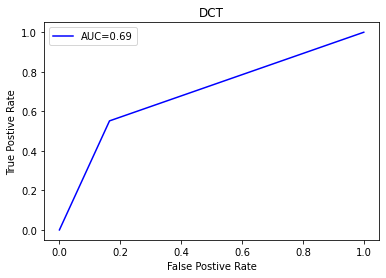

0.6934960333141055

In [77]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred4)
rac=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%rac)
plt.legend()
plt.title("DCT")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
metrics.roc_auc_score(y_test, y_pred4)

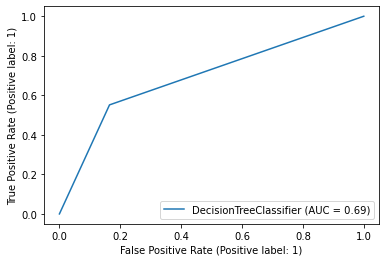

In [78]:
metrics.plot_roc_curve(dt_model, x_test, y_test)


# HYPERTUNING

In [79]:
# randomized search cv
from sklearn.model_selection import RandomizedSearchCV

random_grid={"max_features": ['auto', 'sqrt','log2'],
           "max_depth":np.linspace(5, 30, 6,dtype="int"),
            "min_samples_split": [2, 5, 10, 15,30,50,100],
             "min_samples_leaf":[1, 2, 5, 10],
            "criterion":["gini","entropy"]}

dt_hyper=RandomizedSearchCV(dt_model,param_distributions=random_grid,
                             scoring="accuracy",n_iter=15,cv=5,verbose=5,
                            n_jobs=5)
dt_hyper.fit(x_smo,y_smo)            

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_iter=15, n_jobs=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5, 10, 15, 20, 25, 30]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 30,
                                                              50, 100]},
                   scoring='accuracy', verbose=5)

In [80]:
print(dt_hyper.best_params_)
print("\n",dt_hyper.best_score_)

{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}

 0.8058212877792379


In [81]:
y_pred_h=dt_hyper.predict(x_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_h))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85     37483
           1       0.48      0.57      0.52     10519

    accuracy                           0.77     48002
   macro avg       0.68      0.70      0.68     48002
weighted avg       0.79      0.77      0.78     48002



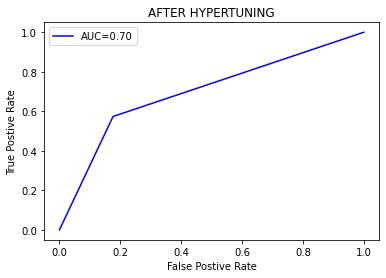

0.6988027937053046

In [82]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_h)
dat=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%dat)
plt.legend()
plt.title("AFTER HYPERTUNING")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
metrics.roc_auc_score(y_test, y_pred_h)

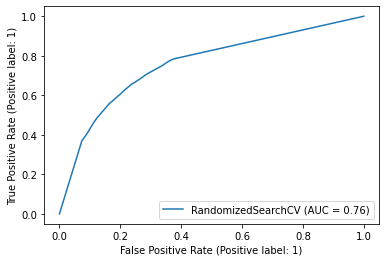

In [83]:
metrics.plot_roc_curve(dt_hyper, x_test, y_test)


# RANDOM FOREST TREE

In [84]:
from sklearn.ensemble import RandomForestClassifier
rft_model=RandomForestClassifier()
rft_model.fit(x_smo,y_smo)

RandomForestClassifier()

In [85]:
y_pred5=rft_model.predict(x_test)

#making the confusion metrics
from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(y_test,y_pred5),index=["actual 0","actual 1"],columns=["pred 0","pred 1"])
print(cm,"\n")
# performance
from sklearn.metrics import accuracy_score
print("accuracy score for test data:",accuracy_score(y_test,y_pred5),"\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred5))

          pred 0  pred 1
actual 0   33965    3518
actual 1    4041    6478 

accuracy score for test data: 0.8425273946918879 

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     37483
           1       0.65      0.62      0.63     10519

    accuracy                           0.84     48002
   macro avg       0.77      0.76      0.77     48002
weighted avg       0.84      0.84      0.84     48002



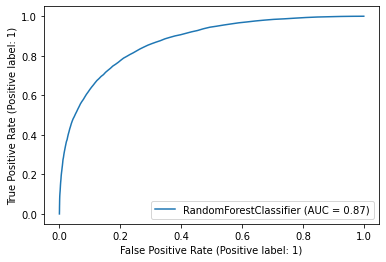

In [86]:
metrics.plot_roc_curve(rft_model, x_test, y_test)


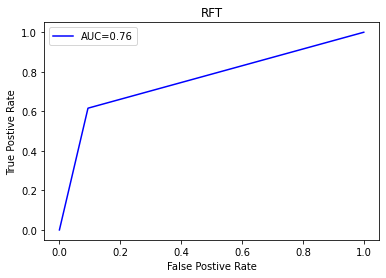

0.7609910630411413

In [87]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred5)
dat=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%dat)
plt.legend()
plt.title("RFT")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
metrics.roc_auc_score(y_test, y_pred5)

# HYPERTUNING

In [88]:
# randomized search cv
from sklearn.model_selection import RandomizedSearchCV

# no. of trees in random forest
n_estimators=[int(x)for x in np.linspace(start=64,stop=1000,num=12)]
# no of features to consider at every split
max_features=["auto","sqrt"]
# maximum no of levels in treedepth
max_depth=[int(x)for x in np.linspace(5,30,num=6)]
# Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf =[1,2,5,10]


random_grid={"n_estimators":n_estimators,
             "max_features":max_features,
           "max_depth":max_depth,
            "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf}

In [89]:
rf_random=RandomizedSearchCV(estimator=rft_model,param_distributions=random_grid,
                             scoring="accuracy",n_iter=5,cv=5,verbose=2,
                            n_jobs=1,random_state=42)
rf_random.fit(x_smo,y_smo)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=744; total time= 2.7min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=744; total time= 2.4min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=744; total time= 2.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=744; total time= 2.3min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=744; total time= 2.4min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=914; total time= 4.1min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=914; total time= 3.9min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=9

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [64, 149, 234, 319, 404,
                                                         489, 574, 659, 744,
                                                         829, 914, 1000]},
                   random_state=42, scoring='accuracy', verbose=2)

In [90]:
print(rf_random.best_params_)
print("\n",rf_random.best_estimator_)
print("\n",rf_random.best_score_)

{'n_estimators': 574, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 20}

 RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=5,
                       n_estimators=574)

 0.8638896189224704


In [91]:
y_pred_rh=rf_random.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test,y_pred_rh),index=["actual 0","actual 1"],columns=["pred 0","pred 1"])
print(cm,"\n")



from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rh))


          pred 0  pred 1
actual 0   33008    4475
actual 1    3602    6917 

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     37483
           1       0.61      0.66      0.63     10519

    accuracy                           0.83     48002
   macro avg       0.75      0.77      0.76     48002
weighted avg       0.84      0.83      0.83     48002



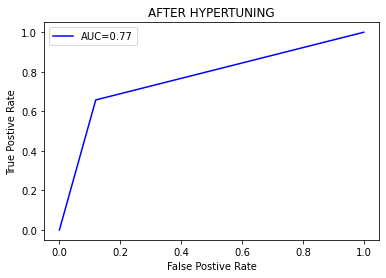

0.7690922784510807

In [92]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_rh)
dat=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%dat)
plt.legend()
plt.title("AFTER HYPERTUNING")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
metrics.roc_auc_score(y_test, y_pred_rh)

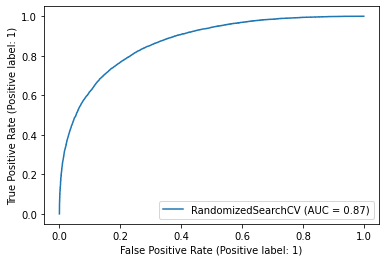

In [93]:
metrics.plot_roc_curve(rf_random, x_test, y_test)


# XGBOOST

In [94]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_smo, y_smo)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:00:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
y_pred7= xgb.predict(x_test)


from sklearn.metrics import confusion_matrix
cm=pd.DataFrame(confusion_matrix(y_test,y_pred7),index=["actual 0","actual 1"],columns=["pred 0","pred 1"])
print(cm,"\n")
# performance
from sklearn.metrics import accuracy_score
print("accuracy score for test data:",accuracy_score(y_test,y_pred7),"\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred7))

          pred 0  pred 1
actual 0   35270    2213
actual 1    4710    5809 

accuracy score for test data: 0.8557768426315571 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     37483
           1       0.72      0.55      0.63     10519

    accuracy                           0.86     48002
   macro avg       0.80      0.75      0.77     48002
weighted avg       0.85      0.86      0.85     48002



0.7690922784510807

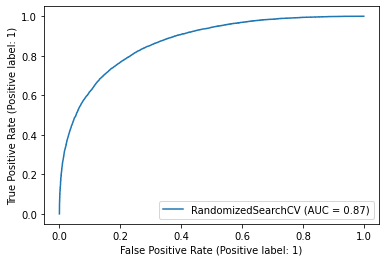

In [96]:
metrics.plot_roc_curve(rf_random, x_test, y_test)
metrics.roc_auc_score(y_test, y_pred_rh)

# HYPERTUNING

In [97]:
from sklearn.model_selection import RandomizedSearchCV
 
params={
    "learning_rate":[.05,.10,.15,.20,25,.30,.35],
    "max_depth":[3,4,5,6,8,10,12,15,20,25],
    "min_child_weight":[1,3,5,7,9],
    "gamma":[.0,.1,.2,.3,.4,.5],
    "colsample_bytree":[.3,.4,.5,.6,.7]}
                                          

In [98]:
xgb_hyper=RandomizedSearchCV(xgb,param_distributions=params,
                             scoring="accuracy",n_iter=10,cv=5,verbose=2,
                            n_jobs=1,random_state=42)
xgb_hyper.fit(x_smo,y_smo)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=  10.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=  10.8s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   9.5s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   9.5s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   9.7s
[17:03:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   4.3s
[17:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   4.0s
[17:03:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   3.8s
[17:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   4.0s
[17:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   3.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:03:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=20, min_child_weight=1; total time=  24.8s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=20, min_child_weight=1; total time=  25.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=20, min_child_weight=1; total time=  26.2s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:04:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=20, min_child_weight=1; total time=  27.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:05:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=20, min_child_weight=1; total time=  26.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:05:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=20, min_child_weight=3; total time=  23.9s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=20, min_child_weight=3; total time=  25.2s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=20, min_child_weight=3; total time=  24.5s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:07:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=20, min_child_weight=3; total time=  24.2s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:07:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=20, min_child_weight=3; total time=  24.5s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:07:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=9; total time=  16.2s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=9; total time=  15.4s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=9; total time=  15.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=9; total time=  14.8s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=9; total time=  14.6s
[17:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.35, max_depth=6, min_child_weight=1; total time=   8.1s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.35, max_depth=6, min_child_weight=1; total time=   7.5s
[17:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.35, max_depth=6, min_child_weight=1; total time=   7.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.35, max_depth=6, min_child_weight=1; total time=   7.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:09:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.35, max_depth=6, min_child_weight=1; total time=   7.1s
[17:09:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   5.6s
[17:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   5.3s
[17:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   5.0s
[17:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   5.0s
[17:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   5.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=25, max_depth=10, min_child_weight=3; total time=   1.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=25, max_depth=10, min_child_weight=3; total time=   1.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=25, max_depth=10, min_child_weight=3; total time=   1.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=25, max_depth=10, min_child_weight=3; total time=   1.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.0, learning_rate=25, max_depth=10, min_child_weight=3; total time=   1.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.35, max_depth=10, min_child_weight=7; total time=  13.4s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.35, max_depth=10, min_child_weight=7; total time=  12.6s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.35, max_depth=10, min_child_weight=7; total time=  12.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.35, max_depth=10, min_child_weight=7; total time=  12.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.35, max_depth=10, min_child_weight=7; total time=  12.0s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=  12.2s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=  11.3s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=  10.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:11:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=  10.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=  10.7s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_pa...
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exac

In [99]:
print(xgb_hyper.best_params_)
print("\n",xgb_hyper.best_estimator_)
print("\n",xgb_hyper.best_score_)

{'min_child_weight': 1, 'max_depth': 20, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.5}

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

 0.8914520367936924


In [100]:
y_pred_xgh=xgb_hyper.predict(x_test)

cm=pd.DataFrame(confusion_matrix(y_test,y_pred_xgh),index=["actual 0","actual 1"],columns=["pred 0","pred 1"])
print(cm,"\n")

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xgh))

          pred 0  pred 1
actual 0   35456    2027
actual 1    4789    5730 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37483
           1       0.74      0.54      0.63     10519

    accuracy                           0.86     48002
   macro avg       0.81      0.75      0.77     48002
weighted avg       0.85      0.86      0.85     48002



In [101]:
metrics.roc_auc_score(y_test, y_pred_rh)

0.7690922784510807

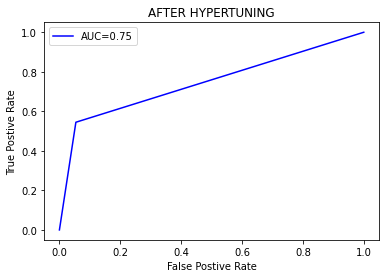

0.7453253688714077

In [102]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred_xgh)
datt=metrics.auc(fpr,tpr)
plt.plot(fpr,tpr,"b",label="AUC=%0.2f"%datt)
plt.legend()
plt.title("AFTER HYPERTUNING")
plt.xlabel("False Postive Rate")
plt.ylabel("True Postive Rate")
plt.show()
metrics.roc_auc_score(y_test, y_pred_xgh)

In [ ]:
xgb_hyper

In [103]:
import joblib as jb
jb.dump(svc,"SVM_M.pkl")

['SVM_M.pkl']

In [104]:
jb.dump(rft_model,"RFT.pkl")

['RFT.pkl']

In [105]:
jb.dump(xgb_hyper,"XGB.pkl")

['XGB.pkl']